<a href="https://colab.research.google.com/github/Srividya1604/Car-Features-EDA-Project/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT TITLE :- Exploratory Data Analysis of Car Features

NAME :- SRIVIDYA AVADHANI

Context of the project is Exploratory data
analysis to be performed on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)and some features.
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset

Exploratory Data Analysis, or EDA, is essentially a type of storytelling for statisticians. It allows us to uncover patterns and insights, often with visual methods, within data. EDA is often the first step of the data modelling process.

#Step 1.1 :- Importing all necessary libraries and loading dataset

In [ ]:
#importing necessary libraries

#libraries for basic computation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                           #visualization
import seaborn as sns                                                     #visualization
%matplotlib inline

#libraries for building model and checking accuracy and others
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading the dataset
car=pd.read_csv('/content/Car Analysis Kaggle.csv')

#Step 1.2 :- Following two is used to get a better view of dataset

transposed so that dataset can be viewed without scrolling 

In [ ]:
car.head().transpose()

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [ ]:
car.tail().transpose()

,11909,11910,11911,11912,11913
Make,Acura,Acura,Acura,Acura,Lincoln
Model,ZDX,ZDX,ZDX,ZDX,Zephyr
Year,2012,2012,2012,2013,2006
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (recommended),regular unleaded
Engine HP,300,300,300,300,221
Engine Cylinders,6,6,6,6,6
Transmission Type,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC
Driven_Wheels,all wheel drive,all wheel drive,all wheel drive,all wheel drive,front wheel drive
Number of Doors,4,4,4,4,4
Market Category,"Crossover,Hatchback,Luxury","Crossover,Hatchback,Luxury","Crossover,Hatchback,Luxury","Crossover,Hatchback,Luxury",Luxury


#Step 1.3 :- Displaying some important information about the dataset

SHAPE OF DATAFRAME

This data set has 11914 instances and 16 features also called as rows and columns. The instances here represent different car brands such as BMW, Mercedes, Audi, and more, features represent Make, Model, MSRP, MPG-City, MPG-Highway,etc.

In [ ]:
#checking Shape
car.shape

(11914, 16)

SUMMARY OF DATAFRAME

The info method prints a summary of the data in the data frame

In [ ]:
car.info

<bound method DataFrame.info of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

SUMMARY STATISTICS OF DATAFRAME

Next step is to perform a number summary for the numeric data.Summary statistics is displayed using describe(). The number summary includes minimum, lower quartile, median, upper quartile, and the maximum values all these values can be obtained by using the describe method.

In [ ]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


COLUMNS OF DATAFRAME

In [ ]:
print(car.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


DATATYPES OF DATAFRAME

To identify the data types, I use the following method. It prints the data in the data frame along with its data types

In [ ]:
#checking Datatypes
car.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

NULL VALUES OF DATAFRAME

Many times there might be a lot of missing values in the dataset.This can be found by using the is_null( ) method which returns the null or missing values in the data frame.

In [ ]:
#checking Null values
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

NUMBER OF CAR AND ITS MAKE

In [ ]:
#No of cars based on their make 
car['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


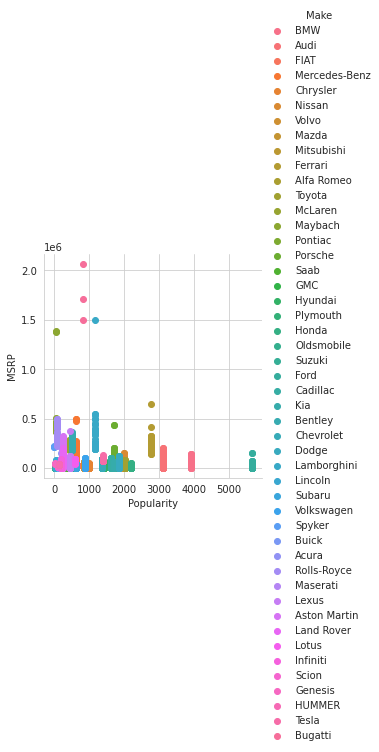

In [ ]:
#2-D Scatter plot with colour for each make.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid"); 
sns.FacetGrid(car,hue="Make",size=4) \
    .map(plt.scatter,"Popularity","MSRP") \
    .add_legend()
plt.show()

#Step 2 :- Dropping the columns of less relevance 

Some features such as Number of doors, Model, Market Category and Engine fuel type will be removed from this dataset. Because these features do not contribute to the prediction of price.

As of now, I will remove the model, it is not needed in this context, it’s the brand which is important not the model of the car.

Also Engine Fuel type and no of doors do not affect the price prediction.

In [ ]:
#Dropping Irrelevant columns
car=car.drop(['Market Category','Number of Doors','Engine Fuel Type','Model'],axis=1)
car.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
Engine HP,335,300,300,230,230,230,300,300,230,230
Engine Cylinders,6,6,6,6,6,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Vehicle Size,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible,Coupe,Convertible,Coupe,Convertible,Convertible
highway MPG,26,28,28,28,28,28,26,28,28,27
city mpg,19,19,20,18,18,18,17,20,18,18


#Step 3 :- Renaming the columns

Renaming the columns of dataset into required names

In [ ]:
car.rename(columns = {'Engine HP':'HP','Engine Cylinders':'Cylinders', 
'Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H', 
'city mpg':'MPG-C','MSRP':'Price'}, inplace=True)
car.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
HP,335,300,300,230,230,230,300,300,230,230
Cylinders,6,6,6,6,6,6,6,6,6,6
Transmission,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Drive Mode,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Vehicle Size,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible,Coupe,Convertible,Coupe,Convertible,Convertible
MPG-H,26,28,28,28,28,28,26,28,28,27
MPG-C,19,19,20,18,18,18,17,20,18,18


#Step 4.1 :- Checking for Missing values or Nulls and Removing Them

Many times there might be a lot of missing values in the dataset. This can be found by using the is_null( ) method which returns the null or missing values in the data frame. So rather than deleting those two entries, I filled those values with the mean. I think rather than deleting this is a good approach because every entry of data is vital. 

In [ ]:
print(car.isnull().sum())

Make              0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [ ]:
#To fill null values here no null val
car=car.fillna(method='ffill')

In [ ]:
print(car.isnull().any())

Make             False
Year             False
HP               False
Cylinders        False
Transmission     False
Drive Mode       False
Vehicle Size     False
Vehicle Style    False
MPG-H            False
MPG-C            False
Popularity       False
Price            False
dtype: bool


Hence Null values were Removed

#Step 4.2 :- Checking For Duplicates and Removing them

This is a handy thing to perform on a data set because often there might be duplicate or redundant data in the data sets, to remove this I used the Price as a reference such that there cannot be more than two same prices of the car, it shows that few data are redundant because prices of the cars can never match very accurately. 

To see how much duplicated data is present following is used

In [ ]:
duplicated=car[car.duplicated()]
print(duplicated.shape)

(801, 12)


Now Duplicates will be removed by following steps

In [ ]:
car.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
HP,335,300,300,230,230,230,300,300,230,230
Cylinders,6,6,6,6,6,6,6,6,6,6
Transmission,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Drive Mode,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Vehicle Size,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact,Compact
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible,Coupe,Convertible,Coupe,Convertible,Convertible
MPG-H,26,28,28,28,28,28,26,28,28,27
MPG-C,19,19,20,18,18,18,17,20,18,18


In [ ]:
car.drop_duplicates().shape

(11113, 12)

Hence duplicates are removed

#Step 4.3 :- Checking For Outliers and Removing them

An outlier is a point or set of points different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers because outliers are one of the primary reasons for resulting in a less accurate model. IQR score technique to detect and remove the outliers.In the plot, you can find some points are outside the box they are none other than outliers

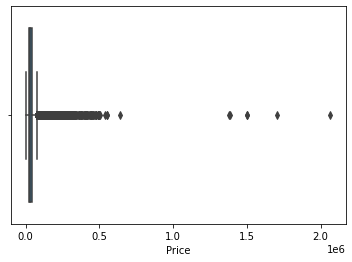

In [ ]:
sns.boxplot(x=car['Price'])

In [ ]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year              9.00
HP              130.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21231.25
dtype: float64


In [ ]:
car = car[~((car < (Q1-1.5 * IQR)) |(car > (Q3+1.5 * IQR))).any(axis=1)]

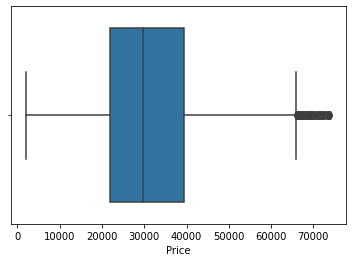

In [ ]:
sns.boxplot(x=car['Price'])

Hence the Outliers are Removed

#Step 5 :- Graphs For Various Columns

GRAPHS FOR FEATURES HAVING NUMERIC VALUE

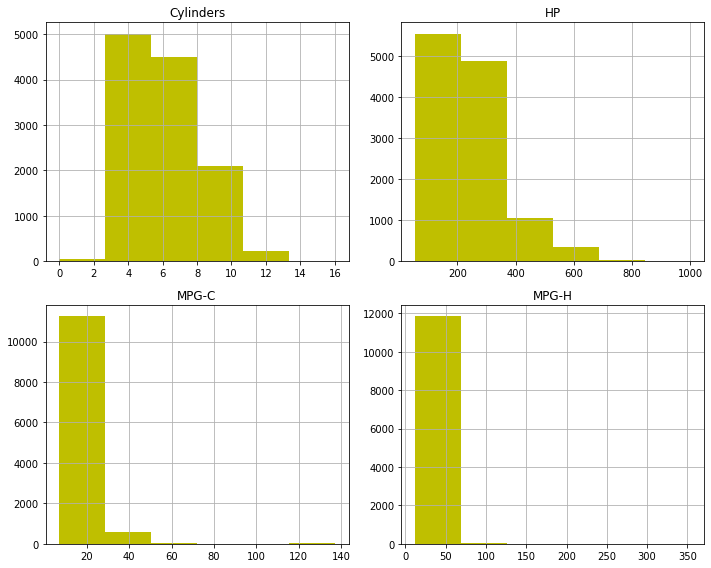

In [ ]:
car[['HP','MPG-H','Cylinders','MPG-C']].hist(figsize=(10,8),bins=6,color='Y')

plt.tight_layout()
plt.show()

From the graph we can infer that
 

*   Max no of cylinders range from 3-6. 
*   Max HP is near 200.
*   Highway MPG and City MPG are in range of 20-60 and 10-30 respectively
 

GRAPHS FOR FEATURES HAVING CATEGORICAL VALUE

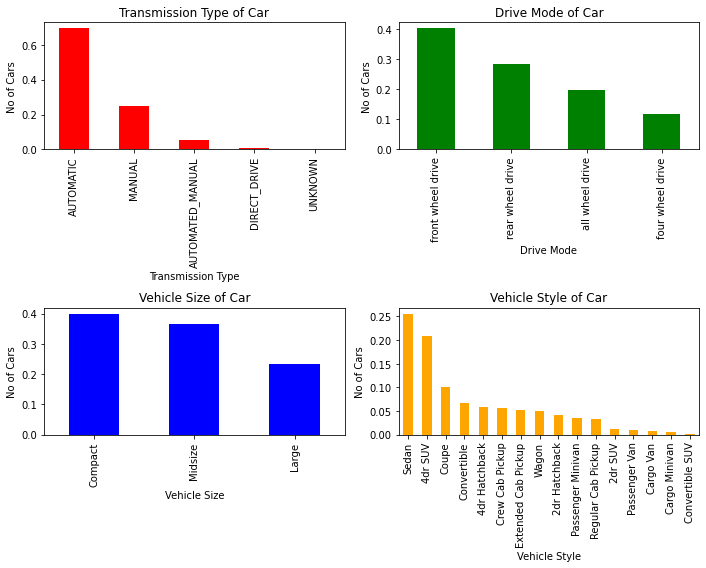

In [ ]:
#graph 1
plt.figure(1)
plt.subplot(221)
car['Transmission'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Transmission Type of Car")
plt.xlabel('Transmission Type')
plt.ylabel('No of Cars');

#graph 2
plt.subplot(222)
car['Drive Mode'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Drive Mode of Car")
plt.xlabel('Drive Mode')
plt.ylabel('No of Cars');

#graph 3
plt.subplot(223)
car['Vehicle Size'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("Vehicle Size of Car")
plt.xlabel('Vehicle Size')
plt.ylabel('No of Cars');

#graph 4
plt.subplot(224)
car['Vehicle Style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Vehicle Style of Car")
plt.xlabel('Vehicle Style')
plt.ylabel('No of Cars');

plt.tight_layout()
plt.show()


From graphs We see that Maximum no of cars are automatic, front wheel driven, compact and sedan style.

#Step 6.1 :- Most represented Car Brands in the dataset

Top 10 Car Brands

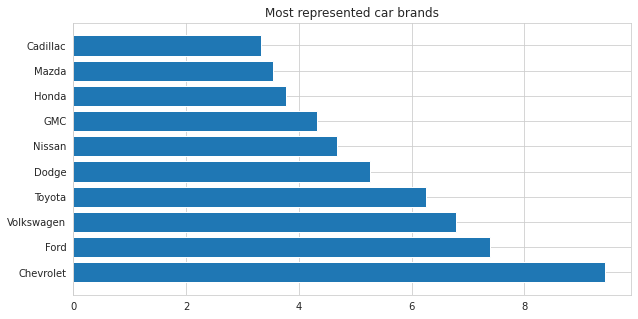

In [ ]:
#percentage of car per brand
counts=car['Make'].value_counts()*100/sum(car['Make'].value_counts())
#Top 10 car brand
popular_make=counts.index[:10]

#plot
plt.figure(figsize=(10,5))
plt.barh(popular_make, width=counts[:10])
plt.title("Most represented car brands")
plt.show()

From the Graph It is clear that Top 5 brands are CHEVROLET , FORD , VOLKSWAGEN , TOYOTA and DODGE

#Step 6.2 :- Average Price among the Top Car Brands

From previous Most represented car brands , top 5 are chosen to see the average price among them

In [ ]:
prices=car[['Make','Price']].loc[(car['Make']=='Chevrolet')|
                                (car['Make']=='Ford')|
                                 (car['Make']=='Volkswagen')|
                                 (car['Make']=='Toyota')|
                                 (car['Make']=='Dodge')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28350.385574
Dodge       22390.059105
Ford        27399.266742
Toyota      29030.016086
Volkswagen  28102.380717


Piechart for Average Prices Of top brands

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


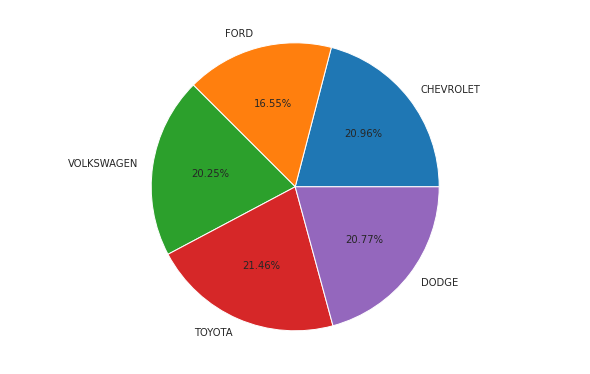

In [ ]:
cars = ['CHEVROLET' , 'FORD' , 'VOLKSWAGEN' , 'TOYOTA' , 'DODGE'] 
fig = plt.figure(figsize =(8, 5)) 
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.pie(prices, labels = cars, autopct='%1.2f%%') 
  
# show plot 
plt.show() 

The piechart makes it easier to see that among top 5 car brands Toyota is most expensive and Ford is Least Expensive

#Step 7 :- Correlation Matrix and Heat Map

CORRELATION MATRIX

In [ ]:
car.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330966,-0.103807,0.362741,0.328945,0.202637,0.606315
HP,0.330966,1.000000,0.736532,-0.467195,-0.561765,0.108887,0.740020
Cylinders,-0.103807,0.736532,1.000000,-0.705239,-0.755929,0.029263,0.379072
MPG-H,0.362741,-0.467195,-0.705239,1.000000,0.938849,0.073455,-0.120786
MPG-C,0.328945,-0.561765,-0.755929,0.938849,1.000000,0.064806,-0.192441
Popularity,0.202637,0.108887,0.029263,0.073455,0.064806,1.000000,0.118664
Price,0.606315,0.740020,0.379072,-0.120786,-0.192441,0.118664,1.000000


High correlation between 
* Cylinders & HP
* Highway mpg & City mpg

The more cylinders there are, the more powerful the car is

High anticorrelation between Cylinders & Highway MPG
Highway MPG ie lower MPG figures mean higher fuel consumption.

HEAT MAP

Heat Map is a plot which is necessary when we need to find the dependent variables. One of the best ways to find the correlation between the features can be done using heat maps.Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. For the rest the larger the number higher the correlation between the two variables. 

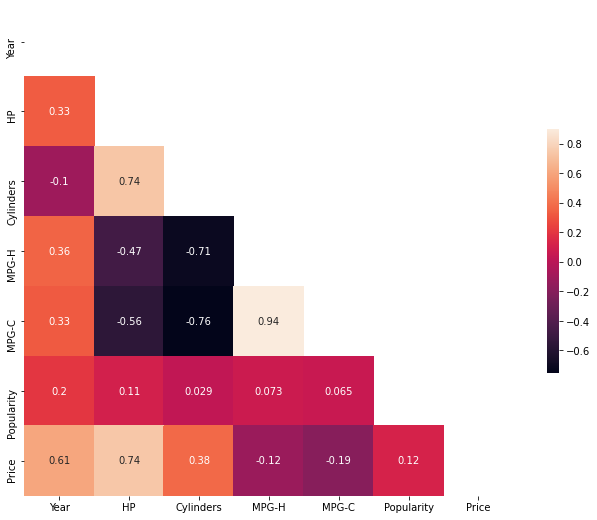

In [ ]:
corrmat=car.corr()
plt.subplots(figsize=(12,9))
mask=np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corrmat,vmax=0.9,square=True, annot=True,mask=mask,cbar_kws={"shrink":.5})

From the heat map we infer that 
   
*  Price greatly depends on HP and Cylinders
*  Also HP and Cylinders are positively dependent on each other
*  And MPG-H MPG-C are negatively dependent on cylinders





   






#Step 8:-Plotting different graphs to see how other variables affect the price of the car

GRAPH 1 :- HORSEPOWER AND PRICE




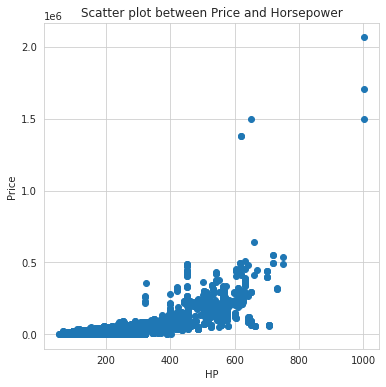

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(car['HP'], car['Price'])
plt.title('Scatter plot between Price and Horsepower')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

 It is proved by the graph above that Horsepower and Price are Positively Related ie higher the HP higher is the price

GRAPH 2 :- NUMBER OF CYLINDERS AND PRICE 

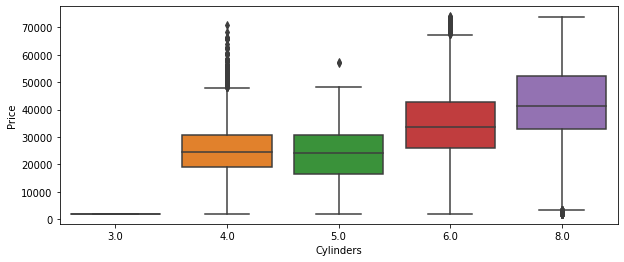

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
ax = sns.boxplot(x="Cylinders", y="Price", data=car)

From the graph it is clear that Number of Cylinders and Price are also Directly Related ie as number increases prices also increases

GRAPH 3 :- VEHICLE SIZE AND TRANSMISSION OVER PRICE

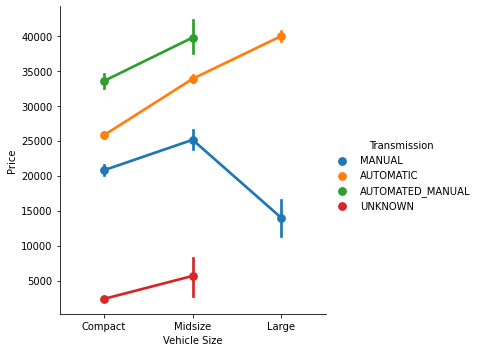

In [ ]:
sns.catplot(data=car, x="Vehicle Size", y="Price", hue="Transmission" ,kind="point")

Hence Automated Manual Transmission is most expensive for Mid-Sized vehicles and Automatic for large vehicle size.

GRAPH 4 :- PRICES OVER YEARS

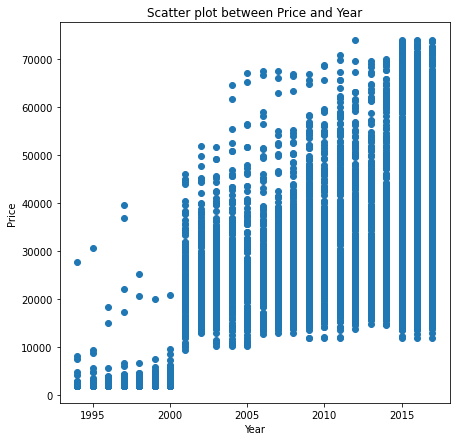

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(car['Year'], car['Price'])
plt.title('Scatter plot between Price and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

Prices have rised after 2001. It is true as Nowadays the demand for cars are increasing hence price increases

GRAPH 5 :- EFFECT OF VEHICLE STYLE

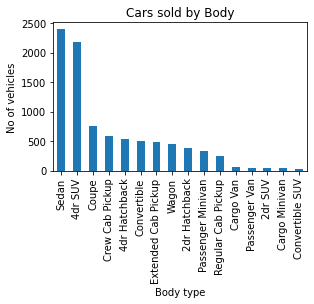

In [ ]:
car['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by Body")
plt.ylabel('No of vehicles')
plt.xlabel('Body type');

Hence Sedan cars were most sold foloowed by 4dr SUV 

GRAPH 6 :- EFFECT OF VEHICLE STYLE AND DRIVE MODE

Text(0.5, 0, 'Count of vehicles')

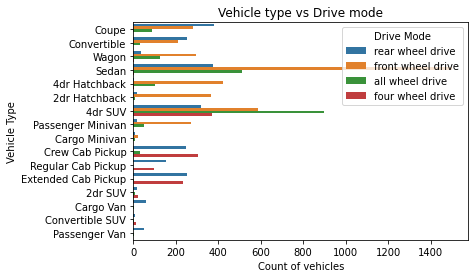

In [ ]:
sns.countplot(y='Vehicle Style', data=car,hue='Drive Mode')
plt.title("Vehicle type vs Drive mode")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

GRAPH 7 :- MPG AND PRICE

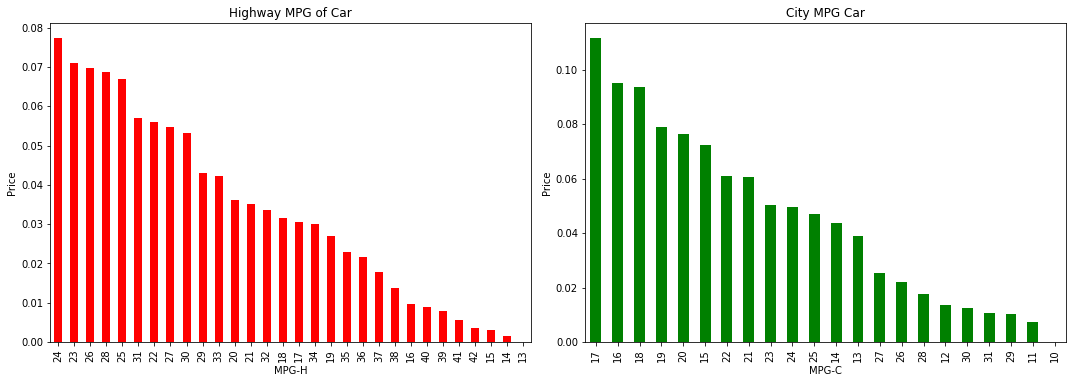

In [ ]:
#graph for highway mileage
plt.figure(1)
plt.subplot(221)
car['MPG-H'].value_counts(normalize=True).plot(figsize=(15,10),kind='bar',color='red')
plt.title("Highway MPG of Car")
plt.xlabel('MPG-H')
plt.ylabel('Price');

#graph for city mileage
plt.subplot(222)
car['MPG-C'].value_counts(normalize=True).plot(figsize=(15,10),kind='bar',color='green')
plt.title("City MPG Car")
plt.xlabel('MPG-C')
plt.ylabel('Price');
plt.tight_layout()
plt.show()

From these graphs we can infer that the Price and MPG (both city and highway) are Inversely Proportional. This is true as high MPG comes with economical cars and expensive cars tend to have a poorer MPG

GRAPH 8 :- MAKING A NEW GROUP "PRICE GROUP"

In [ ]:
#Create a new col price_grp and assign value based on car price
car['price_grp']=pd.cut(car['Price'],[0,20000,40000,60000,80000,100000,600000],
                        labels=['<20k','20-39k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
car['price_grp']=car['price_grp'].astype(object)

Text(0.5, 0, 'price_grp')

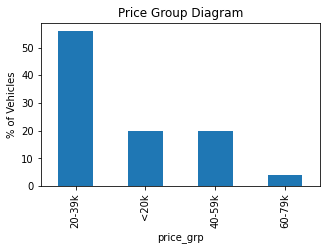

In [ ]:
(car['price_grp'].value_counts() / len(car) *100).plot.bar(figsize=(5,3))
plt.title("Price Group Diagram")
plt.ylabel('% of Vehicles')
plt.xlabel('price_grp')

Hence car in 20-39k range are most sold

#Step 9 :- Machine learning model with Price as the target variable

Algorithm used for this is Linear regression

In [25]:
x = car[['HP','Year','Cylinders','MPG-C','MPG-H','Popularity']].values
y = car['Price'].values

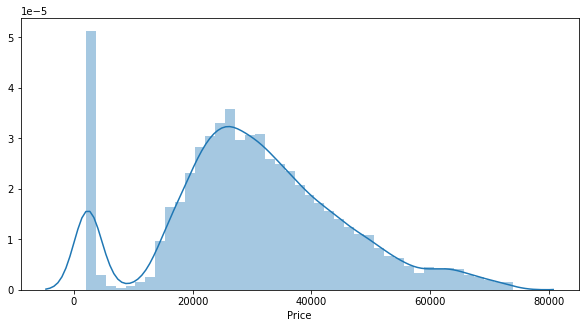

In [27]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(car['Price'])

Splitting of dataset into trainig and test sets

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
car = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
car1 = car.head(25)
print(car1)

    Actual     Predicted
0    29155  34547.667325
1    25030  22543.299601
2    20820  18992.326243
3    18999  22238.566953
4    42750  34484.038606
5    22350  25594.470566
6    49580  51708.050663
7    37070  41690.782632
8    39275  37381.171851
9     2423   3167.241188
10   22940  34721.929040
11   39275  40952.608689
12   31750  32624.228319
13   34100  42111.947377
14   25520  21892.592290
15   23235  26266.590981
16   35200  37257.689052
17   40950  37138.117859
18   22495  18180.881840
19   22695  27653.497935
20   55600  47827.413810
21   24995  27479.937540
22   36600  36010.989560
23   38995  51050.835754
24   35750  36173.219448


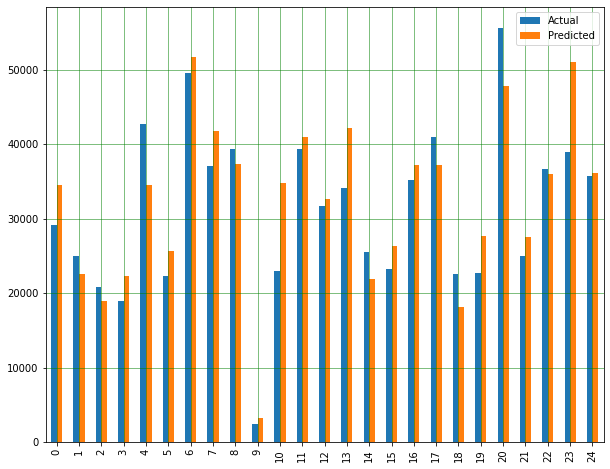

In [32]:
car1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

MAE MSE and RMSE 

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6290.984239069469
Mean Squared Error: 68242995.85738465
Root Mean Squared Error: 8260.931900057321


R Square value

In [34]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.6929720526785494

#Step 10 :- Using different algorithm and check the performance over metrics like R square, RMSE, MAE etc

Fitting Random Forest Regression to dataset

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 300, random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

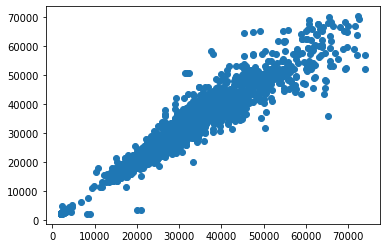

In [36]:
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

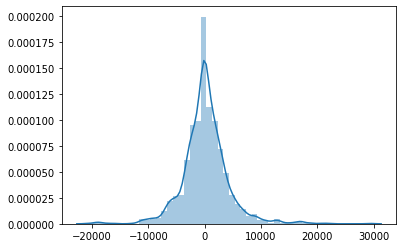

In [37]:
sns.distplot((y_test-y_pred),bins=50)

MAE MSE and RMSE

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2775.764579220001
Mean Squared Error: 17077115.049309477
Root Mean Squared Error: 4132.446617841479


R Square value

In [39]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.9231693815037229

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.An R-squared of 100% means that all movements of dependent variable are completely explained by movements in the index independent variable(s) you are interested in . Clearly Random Forest performs better than linear regression in this case as r_score value is much higher.